### Data import

In [41]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from import_data import get_data_frame

divergin_palette = sns.diverging_palette(250, 15, s=99, l=60, center="dark")

file_name = 'forest-cover-type.csv'
path_relazione = '../../../relazione/img/'
path = '../../data/'

In [42]:
df = get_data_frame(path + file_name)

Path:  ../../data/forest-cover-type.csv
Colonne tot:  55


In [3]:
df.head(7)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   
5       2579     132      6                               300   
6       2606      45      7                               270   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   
5                             -15                               67   
6                               5                              633   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   
5            230             237            140   
6            222             225            138   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6279  ...            0            0   
1                                6225  ...            0            0   
2                                6121  ...            0            0   
3                                6211  ...            0            0   
4                                6172  ...            0            0   
5                                6031  ...            0            0   
6                                6256  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   
5            0            0            0            0            0   
6            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           5  
2            0            0           2  
3            0            0           2  
4            0            0           5  
5            0            0           2  
6            0            0           5  

[7 rows x 55 columns]

In [4]:
df.isnull().values.any()

False

In [44]:
sns.set(font_scale=0.3)
plotted = sns.heatmap(df.corr(),cmap = divergin_palette)
fig = plotted.get_figure()
fig.savefig(path_relazione + f'full_correlation_matrix.pdf')

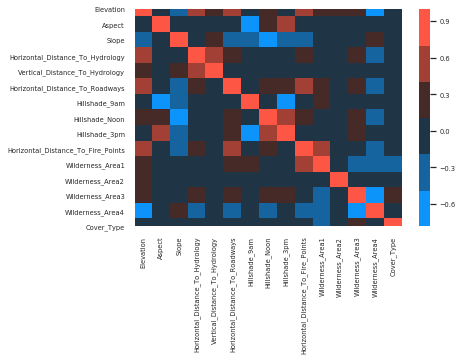

In [46]:
sns.set(font_scale=0.6)
usefull_col = [el for el in df.columns if not "Soil_Type" in el ]
plotted = sns.heatmap(df[usefull_col].corr(),cmap=divergin_palette)
fig = plotted.get_figure()
fig.savefig(path_relazione + f'usefull_correlation_matrix.pdf')

In [10]:
sns.set(font_scale=1.0)
count = df['Cover_Type'].value_counts()
sns_plot = count.plot(kind='barh',x='perc',y='label')
sns_plot.get_figure().savefig(f'{path_relazione}cover_type_distr.pdf')

In [7]:
count.sum(),count

(15120, 7    2160
 6    2160
 5    2160
 4    2160
 3    2160
 2    2160
 1    2160
 Name: Cover_Type, dtype: int64)

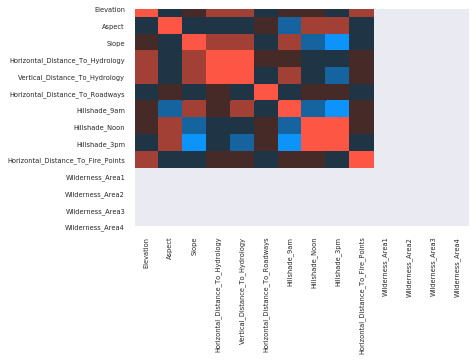

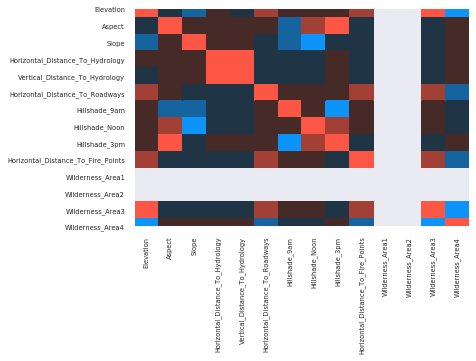

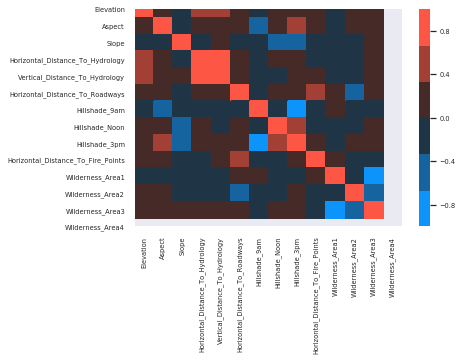

In [47]:
sns.set(font_scale=0.6)
for nth,t in enumerate(np.unique(df['Cover_Type'])):
    plt.figure()
    sub_df = df[df['Cover_Type']==t][usefull_col].drop(['Cover_Type'],axis=1)
    corr = sub_df.corr()
    plotted = sns.heatmap(corr, cmap = divergin_palette, vmin = -1,vmax=1,cbar = True if nth==6 else False)
    fig = plotted.get_figure()
    fig.savefig(path_relazione + f'_{t}_correlation_matrix.pdf')